In [22]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.python.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import time
import os
%matplotlib inline

class NLP:
    
    def __init__(self):
        self.output_vectors=[]
        self.input_text_vectors=[]
        self.constraints_vectors=[]
        self.keywords_vectors=[]
        self.output=[]
        self.num_words=1000
        self.number_of_constraints=0
        ck = pd.read_csv("./const_key.csv")  #ck.iloc[:, 0]
        self.keywords=ck.iloc[0:3, 1].tolist()
        self.constraints = (ck.iloc[:, 0]).tolist()
        self.input_text = ""
        self.temp =[]
        self.key_count = 0
        
    def input_query(self, input_string):
        self.input_text=input_string
        
    def processing(self):
        self.temp=(self.input_text).split(" ")
        l1=self.temp+self.constraints+self.keywords
        l = [l1]
        tokenizer=Tokenizer(num_words=self.num_words)
        tokenizer.fit_on_texts(l)
        token_outputs=tokenizer.word_index
        for i in range(len(self.temp)):
            self.input_text_vectors.append(token_outputs[self.temp[i]])
        for j in range(len(self.constraints)):
            self.constraints_vectors.append(token_outputs[self.constraints[j]])
        for k in range(len(self.keywords)):
            self.keywords_vectors.append(token_outputs[self.keywords[k]])
        for m in range(len(self.input_text_vectors)):
            for n in range(len(self.constraints_vectors)):
                if(self.input_text_vectors[m]==self.constraints_vectors[n]):
                    self.output_vectors.append(self.input_text_vectors[m])
                    self.number_of_constraints+=1
        for o in range(len(self.input_text_vectors)):
            for p in range(len(self.keywords_vectors)):
                if(self.input_text_vectors[o]==self.keywords_vectors[p]):#must handle array index out of bound error and print query incomplete
                    try:
                        self.key_count += 1
                        self.output_vectors.append(self.input_text_vectors[o+1])
                    except IndexError as e:
                        print("Query does not contain enough parameters.")
                        return self.processing()
        self.output.append(self.number_of_constraints)
        for q in range(len(self.output_vectors)):
            for value,vectors in token_outputs.items():
                if (self.output_vectors[q]==vectors):
                    self.output.append(value)
        if 'predict' in self.output:
            return self.output
        if self.number_of_constraints <= self.key_count:
            return self.output
        else:
            print("Not enough keywords")
            self.input_query()

class Visualize:
    def __init__(self):
        self.df1 = pd.read_csv('./movie_name_char_mentions_centrality.csv')
        self.df2 = pd.read_csv('./movie_emotion_year.csv')
        self.df3 = pd.read_csv('./movie_singer_count.csv')
        self.df4 = pd.read_csv('./movie_plot.csv')
        self.df5 = pd.read_csv('./movie_all.csv')
        
    def lead_role(self, q):
        output_string = ""
        col = self.df1[self.df1['movie']==q]
        if(col.empty):
            output_string += str("The movie "+  str(q) + " is not found in the database. Try again with another value.")
            return output_string
        ser = col['name']
        result = 'actor' in ser.values
        if(result):
            output_string += "The lead role is 'actor'" + str("\nThe type of role played is: " + str(col[col['name'].values=='actor']['character']))
            return output_string
        else:
            col = col.sort_values(by=['count'], ascending=False)
            ser = col['name']
            nam = ser.values[0]
            ind = ser[ser==nam].index[0]
            output_string += str("The lead role is:" + str(nam))
            output_string += str("\nThe type of role played is: " +  str(self.df1[self.df1['index']==ind]['character'].values[0]))
            return output_string
            
    def characters(self, q):
        output_string = ""
        col = self.df1[self.df1['movie']==q]
        if(col.empty):
            output_string += "The movie " + str(q) + " is not found in the database. Try again with another value."
            return output_string
        ser = col['name']
        output_string += "The characters in the movies " + str(q) + " include:\n" + str(col[['name', 'character']])
        return output_string
        
    def character(self, q, m):
        output_string = ""
        
        col = self.df1[self.df1['movie']==m]
        if(col.empty):
            output_string += "The movie " + str(m) + " is not found in the database. Try again with another value."
            return output_string
        ser = col['name']
        nam = "NULL"
        try:
            nam = ser[ser==q].values[0]
        except IndexError as e:
            output_string += "The character " + str(q) + " is not found in the database.Try again with another value."
            return output_string
        ind = ser[ser==nam].index[0]
        output_string += "The role is: " + str(nam) + "\nThe type of role played is: " + str(self.df1[self.df1['index']==ind]['character'].values[0])
        return output_string
        
    def plot(self, m):
        output_string = ""
        pd.set_option('display.max_colwidth', -1)
        col = self.df4[self.df4['movie']==m]
        if(col.empty):
            output_string += "The movie " + str(m) + " is not found in the database. Try again with another value."
            return output_string
        output_string += "The plot of the film goes like: " + str(col['plot'])
        return output_string
        
    def appearances(self, c, m):
        output_string = ""
        col = self.df1[self.df1['movie'] == m]
        if(col.empty):
            output_string += "The movie " + str(m) + " is not found in the database. Try again with another value."
            return output_string
        ser = col['name']
        try:
            nam = ser[ser==c].values[0]
        except IndexError as e:
            output_string += "The character " + str(c) + " is not found in the database.Try again with another value."
            return output_string
        ind = ser[ser==nam].index[0]
        output_string += "The role is:" + str(nam)
        output_string += "\nThe number of appearances are: " + str(self.df1[self.df1['index']==ind]['count'].values[0])
        output_string += "\nThe average centrality is: " + str(self.df1[self.df1['index']==ind]['average centrality'].values[0])
        output_string += "\nThe total centrality is: " +  str(self.df1[self.df1['index']==ind]['total centrality'].values[0])
        return output_string
       
        
    def year(self, m):
        output_string = ""
        col = self.df2[self.df2['movie'] == m]
        if(col.empty):
            output_string += "The movie " + str(m) + " is not found in the database. Try again with another value."
            return output_string
        output_string += "The movie " + str(m) + " released in the year " + str(col['year'].values[0])
        return output_string
        
    def songs(self, m):
        output_string = ""
        col = self.df3[self.df3['movie'] == m]
        if(col.empty):
            output_string += "The movie " + str(m) + " is not found in the database. Try again with another value."
            return output_string
        singers = col['singer_name'].values.tolist()
        output_string += "The movie " + str(m) + " has " + str(col['song_count'].sum(), " songs.\n")
        output_string += "And the singers are:\n" + str(singers)
        return output_string
        
    def average_emotion(self, m, n):
        output_string = ""
        col = self.df2[self.df2['movie']==m]
        if(col.empty):
            output_string += "The movie " + str(m) + " is not found in the database. Try again with another value."
            return output_string
        se = col['emotion'].value_counts()
        
        
            #plt.show()
            #avg_emo = str(time.time())
            #plt.savefig(avg_emo)
        
        maxi = max(se.values)
        mini = min(se.values)
        max_per = (maxi/sum(se.values))*100
        min_per = (mini/sum(se.values))*100
        
        output_string += '\nThe most expressed emotion in the film is ' + str(se[se == maxi].index[0]) + " and constitutes to " + str(max_per) + "%"
        output_string += '\nThe most expressed emotion in the film is ' + str(se[se == mini].index[0]) + " and constitutes to " + str(min_per) + "%"      
        # creating word cloud
        loc = self.create_wordcloud(col)
        
        #output_string += self.genre(m, output_string)
            
        return (output_string, loc)
        
    def create_wordcloud(self, q):
        output_string = ""
        from wordcloud import WordCloud, STOPWORDS 
        #print("\n\nThe wordcloud created for the emotions of the data in the film:\n")
        comment_words = ' '
        stopwords = set(STOPWORDS) 

        for val in q: 
            val = str(val) 
            tokens = val.split()  
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 

            for words in tokens: 
                comment_words = comment_words + words + ' '


        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(' '.join(q['emotion'])) 

        plt.figure(figsize = (4, 4), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        #plt.show()
        avg_emo = str(time.time()) + '.png'
        plt.savefig(avg_emo)
        return avg_emo
        #print("Note: The the size of the word increases with higher expressed emotion.")
        
    def genre(self, m, output_string=None):
        if output_string == None:
            output_string = ""
        col = self.df2[self.df2['movie']==m]
        if(col.empty):
            output_string += "The movie " + m + " is not found in the database. Try again with another value."
            return output_string
        se = col['emotion'].value_counts()
        gen = se[se == max(se.values)].index[0]
        
        #fuzzying the output
        
        if(gen=="happy"):
            genre = "Family-Entertainer"
        elif(gen == "neutral"):
            genre = "Drama"
        elif(gen == "sad"):
            genre = "Melo-Drama"
        elif(gen == "angry"):
            genre = "Action"
        elif(gen == "fear"):
            genre = "Horror"
        elif(gen=="suprise"):
            genre = "Suspence Thriller"
        elif(gen=="disgust"):
            genre = "Crime-Thriller"
        output_string += "\nGENRE:\n"
        output_string += "The movie " + str(m) + " is a " + str(genre) + " genre film."
        return output_string
        
    def length_of_movie(self, m):
        output_string = ""
        col = self.df1[self.df1['movie']==m]
        if(col.empty):
            output_string += "The movie " + str(m) + " is not found in the database. Try again with another value."
            return output_string
        se1 = col['mentions'].sum()
        se2 = col['count'].sum()
        se3 = col['total centrality'].sum()
        se4 = col['average centrality'].sum()
        result = se1 + (se3/se2) + se4                               # creating an estimation variable
        est_time = 150
        est_result = 70
        if(35<result<est_result):                                    # fuzzyfying the result into time or length of movie
            length = est_time
        elif(30<result<est_result/2):
            length = est_time-20
        elif(70<result<est_result*2):
            length = est_time+20
        elif(140<result<est_result*4):
            length = est_time+10
        else:
            length = est_time - 10
        output_string += "The predicted length of movie " + m + " on the basis of Centrality and Mentions is about " + str(np.round((length/60), 2))
        return output_string

    def trends(self, bol):
        output_string = "Shows the variation in emotion of movies over the years"
        df = {}
        for i in range(10):
            df[i] = self.df2[self.df2['year']==2008+i]['emotion'].value_counts().to_frame()
            df[i].columns = [2008+i]
        df_area = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7],df[8], df[9]], axis=1)
        if(bol):
            #print(df_area)
            df_area.transpose().plot.area()
            plt.xlabel("Year")
            plt.ylabel("Range")
            avg_emo = str(time.time()) + '.png'
            plt.savefig(avg_emo)
            #plt.show()
            return output_string, avg_emo
        else:
            return df_area
        
    def predict(self):
        df_area = self.trends(False)
        # ?? print(df_area)
        # Data-Preprocessing
        z = pd.read_csv('./trend_emotion.csv')
        X = z.iloc[:, :-1]
        y = z.iloc[:, -1]
        # Spliting Data 
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        # Linear Regression
        from sklearn.linear_model import LinearRegression
        lm = LinearRegression()
        lm.fit(X_train, y_train)
        predictions_lin = lm.predict(X_test)
       
        # Calculating the Result in terms of errors
        from sklearn import metrics
        result = list()
        result.append(metrics.mean_squared_error(y_test, predictions_lin))
        result = np.array(result)
        new = list()
        emotions = ['angry', 'disgust', 'fear', 'happy', 'neurtal', 'sad', 'suprise']
        print("\n")
        for i in range(7):
            print("Enter value of",emotions[i],":", end="")
            new.append(int(input()))
        result = lm.predict([new])
        print("\nThe predicted year according the values given is ",result[0])
        
    def image_movie(self, arr):
        for i in range(len(arr)):
            print(arr[i])
            if arr[i] in self.df5.iloc[:, -1].values:
                m = arr[i]
                self.lead_role(m)
                self.characters(m)
                self.plot(m)
                self.year(m)
                self.songs(m)
                self.average_emotion(m, 0)
                self.length_of_movie(m)
                return
        print("Could not find the movie in the dataset")

In [25]:
from Master import NLP, Visualize


# Helper Functions

def process_input_text_query(input_string):
    ob = NLP()
    ob.input_query(input_string)
    tensor = ob.processing()
    #print(tensor)
    output_list = generic_process(tensor, input_string)
    output_ques = input_string.split("and")
    output_ques = '|'.join(output_ques)
    output_list.insert(0, output_ques)
    return output_list

def process_input_image_query(path):
    ob = ImageProcessing()
    tensor = ob.image_process()
    output_list = obj.image_movie(tensor)          # Contains string, image saved path
    return output_list
    
def generic_process(tensor, input_string):
    obj = Visualize()
    count = tensor[0]
    for i in range(1, tensor[0]+1):
        if i == 1:
            output_string = ''
            output_loc = ''
            output_desc = ''
        else:
            output_string += '|'
            output_loc += '|'
            output_desc += '|'
            
        if tensor[i]=="role":
            output_string += obj.lead_role(tensor[i + count])
            output_loc += 'None'
            output_desc += 'None'
            
        elif tensor[i]=="characters":
            output_string += obj.characters(tensor[i+count])
            output_loc += 'None'
            output_desc += 'None'
        
        elif tensor[i]=="attitude":
            output_string += obj.character(tensor[i+count], tensor[i+count+1])
            count += 1
            output_loc += 'None'
            output_desc += 'None'
            
        elif tensor[i]=="plot":
            output_string += obj.plot(tensor[i+count])
            output_loc += 'None'
            output_desc += 'None'
        
        elif tensor[i]=="appearances":
            output_string += obj.appearances(tensor[i+count], tensor[i+count+1])
            count += 1
            output_loc += 'None'
            output_desc += 'None'
            
        elif tensor[i]=="year":
            output_string += obj.year(tensor[i+count])
            output_loc += 'None'
            output_desc += 'None'
            
        elif tensor[i]=="songs":
            output_string += obj.songs(tensor[i+count])
            output_loc += 'None'
            output_desc += 'None'
        
        elif tensor[i]=="emotion":
            try:
                if ("average" in input_string):
                    (out, loc) = obj.average_emotion(tensor[i+count], 0)
                    output_desc += out
                    output_loc += str(os.getcwd()) + '/' + loc
                    output_string += "None"
                    break
                elif("predict" in ob.temp):
                    output_string += obj.predict()
                    break
            except IndexError as e:
                output_string += "Not enough parameters"
                break
        
        elif tensor[i]=="genre":
            output_string += obj.genre(tensor[i+count])
            output_loc += 'None'
            output_desc += 'None'
            
        elif tensor[i]=="length":
            output_string += obj.length_of_movie(tensor[i+count])
            output_loc += 'None'
            output_desc += 'None'

        elif tensor[i]=="variation":
            (out, loc) = obj.trends(True)
            output_desc += out
            output_loc += str(os.getcwd()) + '/' + loc
            output_string += "None"

        else:
            output_string += "Query does not contain enough parameters."
            
    return [output_string, output_loc, output_desc]
    

SyntaxError: invalid syntax (Master.py, line 12)

whas is variation in movie s | what is lead role in movie shamitabh | what is release year of movie shamitabh | what is average emotion in movie maatr

None|The lead role is:pandey
The type of role played is: assistant|The movie shamitabh released in the year 2015|None

/Users/nikhiljsk/Desktop/movie_data_analysis-master/Movie_analysis/Movie Analysis/1555539227.29893.png|None|None|/Users/nikhiljsk/Desktop/movie_data_analysis-master/Movie_analysis/Movie Analysis/1555539227.693655.png

Shows the variation in emotion of movies over the years|None|None|
The most expressed emotion in the film is sad and constitutes to 48.0%
The most expressed emotion in the film is fear and constitutes to 4.0%



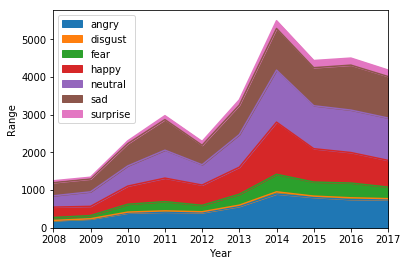

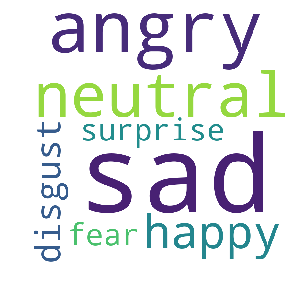

In [26]:
result = process_input_text_query("whas is variation in movie s and what is lead role in movie shamitabh and what is release year of movie shamitabh and what is average emotion in movie maatr")
for i in result:
    print(i)
    print()